# Sommaire :
 
 **<a href="#C1">IMPORTATION </a>**
  - <a href ="#C11"> Importation des libraries</a>
  - <a href ="#C12"> Chargement des données</a>
  
**<a href="#C2"> PREPARATION DE DONNEES </a>**
  - <a href ="#C21"> 2.1)  Division des données en ensembles d'entraînement et de test</a>
  -<a href ="#C22"> 2.2)  Création du caractère aléatoire et proportionnelle de la division </a>
  
**<a href="#C3"> MODELISATION </a>**
  - <a href ="#C31"> 3.1) Regression linéaire </a>
  - <a href ="#C32"> 3.2) Forêt Aléatoire </a>
  - <a href ="#C33"> 3.3) Gradient Boosting </a>
  - <a href ="#C34"> 3.4) MLP </a>
  - <a href ="#C35"> 3.5) XGBoost </a>

**<a href="#C4"> CHOIX DU MODELE </a>**
  - <a href="#C41"> 4.1) Tableau récapitulatif des score du modèle </a>
  - <a href="#C42"> 4.2) Modèle XGBoost avec la librairie LIME </a>
  
**<a href="#C5"> MODELISATION SANS "ENERGYSTARScore</a>**
  - <a href ="#C51"> 5.1) Regression linéaire </a>
  - <a href ="#C52"> 5.2) Forêt Aléatoire </a>
  - <a href ="#C53"> 5.3) Gradient Boosting </a>
  - <a href ="#C54"> 5.4) MLP </a>
  - <a href ="#C55"> 5.5) XGBoost </a>
  
**<a href="#C6"> CONCLUSION</a>**

# <a name="C1"> IMPORTATION </a>
## <a name="C11"> Importation des libraries</a>

In [1]:
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C12"> Chargement des données</a>

In [2]:
data = pd.read_csv("ohe_Data")
data.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,7,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(1663, 62)

# <a name="C2"> PREPARATION DE DONNEES </a>
## <a name="C21"> 2.1) Division des données en ensembles d'entraînement et de test </a>

In [4]:
X = data.drop(columns= ["Target_Energies","Target_GES","GHGEmissionsIntensity"])
y = data['Target_GES']

In [5]:
X.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,7,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    5.521381
1    5.689886
2    7.644575
3    5.657494
4    6.224578
Name: Target_GES, dtype: float64

## <a name="C22"> 2.2) Création du caractère aléatoire et proportionnelle de la division </a>

In [7]:
# importer train_test_split
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42, shuffle=True)

X_train.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
1563,3,20,0.0,3,10.730794,0.000000,10.730794,88.0,4.765587,5.775483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,2,55,1.0,1,10.631712,0.000000,10.631712,90.0,3.523415,4.231204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
243,7,36,1.0,4,11.602282,10.563595,11.165451,47.5,4.756173,5.839478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,4,70,1.0,1,10.098026,0.000000,10.098026,53.0,2.186051,3.328627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
312,7,20,2.0,5,12.270375,11.654668,11.493284,83.0,3.981549,5.126342,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_test.head()

1448    3.408504
168     9.281225
220     5.893466
1643    4.214347
344     6.169339
Name: Target_GES, dtype: float64

# <a name="C3"> MODELISATION </a>

In [10]:
from sklearn import model_selection

# Créer un modèle avec recherche d'hyperparamètre par validation croisée
from sklearn.model_selection import GridSearchCV

# calculer les scores R² et 
from sklearn.metrics import mean_squared_error, r2_score

## <a name="C31"> 3.1) Regression linéaire </a>

###  a.) Création du modèle
#### Le modèle

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# initialisation du modèle
model = LinearRegression()

# Fixer les valeurs des hyperparamètres à tester
parameters = {'normalize': [True, False]}

In [13]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
lr = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring = 'r2')

In [14]:
# Optimiser sur le jeu d'entraînement
lr.fit(X_train, y_train)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, scoring='r2')

In [15]:
# résultats de la validation croisée
res = lr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013096,0.018041,0.003303,0.004689,True,{'normalize': True},0.908985,-1.226554e+21,-1.870435e+21,-1.467149e+22,0.182631,-3.553696e+21,5.605567e+21,2
1,0.000000,0.000000,0.006252,0.007658,False,{'normalize': False},0.908932,8.858361e-01,9.432302e-01,9.173024e-01,0.182651,7.675902e-01,2.930451e-01,1


In [16]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(lr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'normalize': False}


In [17]:
lr_r2 = lr.best_score_
print("Best score: ", lr.best_score_)

Best score:  0.7675902484492775


#### Prédiction

In [18]:
y_test_pred = lr.predict(X_test)

### b.) Evaluation du modèle

In [19]:
# la racine de l'erreur quadratique moyenne
rmse = mean_squared_error(y_test, y_test_pred)
# l'erreur quadratique moyenne
mse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Le score R²
r2 = r2_score(y_test, y_test_pred)
# l'erreur carré relative
rse = 1-r2

print("Racine de l'erreur quadratique moyenne : ", rmse)

print('----'*20)
print("Erreur quadratique moyenne : ", mse)
print("Erreur carré relative : ", rse)
print('Score R² : ', r2)

Racine de l'erreur quadratique moyenne :  0.19604465402957524
--------------------------------------------------------------------------------
Erreur quadratique moyenne :  0.4427693011372573
Erreur carré relative :  0.08301362316399041
Score R² :  0.9169863768360096


#### Les scores

In [20]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_lr  = pd.DataFrame(scores, index = ['Régression Linéaire'])
df_lr

,mse,rse,R²
Régression Linéaire,0.442769,0.083014,0.916986


### c.) Features importances

In [21]:
# Obtenir les importances de caractéristiques
feat_imp = lr.best_estimator_.coef_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [22]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
8,SiteEUI(kBtu/sf),1.343022
19,PrimaryPropertyType_1,0.540107
6,PropertyGFABuilding(s),0.452275


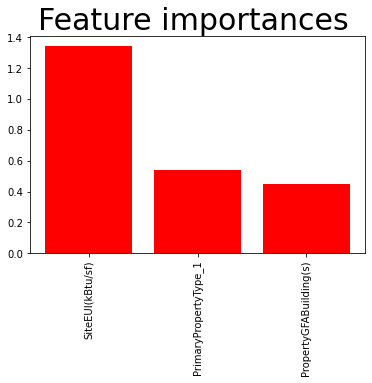

In [23]:
# le graphique à barres à partir de coefficients : 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color= 'red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C32"> 3.2) Forêt Aléatoire </a>

###  a.) Création du modèle
#### modèle

In [24]:
from sklearn.ensemble import RandomForestRegressor as model_class

In [25]:
# initialisation du modèle
rf = model_class(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4,5],
}

In [26]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
rfr = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, scoring = ['r2', 'neg_mean_squared_error'],refit='r2')

In [27]:
# Optimiser sur le jeu d'entraînement
rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [28]:
# résultats de la validation croisée
res = rfr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
0,0.311814,0.009681,0.020462,0.006333,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.445467,0.512755,0.463094,...,0.040774,25,-1.296555,-1.209441,-1.226392,-1.457073,-1.140395,-1.265971,0.107691,25
1,0.460330,0.016154,0.028118,0.006247,1,150,"{'max_depth': 1, 'n_estimators': 150}",0.440254,0.509504,0.469789,...,0.038630,22,-1.308744,-1.217511,-1.211100,-1.456007,-1.120925,-1.262857,0.113395,22
2,0.596241,0.080326,0.025021,0.005871,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.439015,0.508825,0.468327,...,0.038938,24,-1.311640,-1.219195,-1.214439,-1.461075,-1.122667,-1.265803,0.114482,24
3,0.653608,0.097168,0.039768,0.008900,1,250,"{'max_depth': 1, 'n_estimators': 250}",0.439668,0.510757,0.470315,...,0.039476,21,-1.310114,-1.214401,-1.209899,-1.462535,-1.117107,-1.262811,0.117047,21
4,0.914911,0.006076,0.050003,0.006241,1,300,"{'max_depth': 1, 'n_estimators': 300}",0.436573,0.513594,0.470467,...,0.040750,23,-1.317349,-1.207359,-1.209550,-1.461946,-1.120504,-1.263341,0.117295,23
5,0.412836,0.018684,0.018746,0.006245,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.726869,0.731441,0.694033,...,0.020326,20,-0.638609,-0.666617,-0.698886,-0.739103,-0.617963,-0.672236,0.043103,19
6,0.616185,0.012634,0.022233,0.007387,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.721212,0.730266,0.699849,...,0.016580,18,-0.651834,-0.669534,-0.685601,-0.739964,-0.604548,-0.670296,0.044163,18
7,0.696366,0.118845,0.025884,0.011179,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.717987,0.729635,0.699365,...,0.015670,19,-0.659376,-0.671100,-0.686705,-0.742879,-0.601455,-0.672303,0.045555,20
8,0.988926,0.071412,0.050457,0.007277,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.718379,0.730802,0.701797,...,0.014817,16,-0.658458,-0.668204,-0.681150,-0.740049,-0.593829,-0.668338,0.046810,16
9,1.244489,0.026500,0.046570,0.008144,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.716709,0.732906,0.701672,...,0.015768,17,-0.662362,-0.662981,-0.681437,-0.742147,-0.596909,-0.669167,0.046438,17


In [29]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rfr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 5, 'n_estimators': 100}


In [30]:
rfr_r2 = rfr.best_score_
print("Best score: ", rfr.best_score_)

Best score:  0.952509750597993


In [31]:
y_train_pred = rfr.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.9685326572827466


#### Prédiction

In [32]:
y_test_pred = rfr.predict(X_test)

### b.) Evaluation du modèle

In [33]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [34]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_rfr  = pd.DataFrame(scores, index = ['Forêt Aléatoire'])
df_rfr

,mse,rse,R²
Forêt Aléatoire,0.090167,0.038181,0.961819


### c.) Features importances

In [35]:
# Obtenir les importances de caractéristiques
feat_imp = rfr.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [36]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
12,NaturalGas(kBtu),0.633677
11,Electricity(kBtu),0.214215
8,SiteEUI(kBtu/sf),0.082741


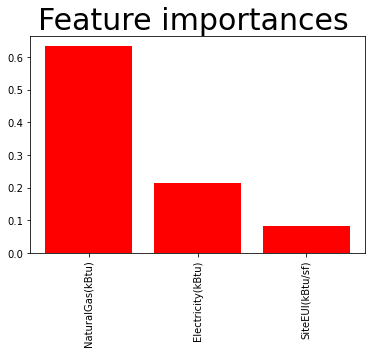

In [37]:
# le graphique à barres à partir de coefficients : 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color= 'red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C33"> 3.3) Gradient Boosting </a>

###  a.) Création du modèle
#### modèle

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# initialisation du modèle
gb =  GradientBoostingRegressor(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
}

In [40]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
gbr = GridSearchCV(estimator=gb, param_grid = param_grid, cv=5, n_jobs=-1, verbose=1, scoring = 'r2')

In [41]:
# Optimiser sur le jeu d'entraînement
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='r2', verbose=1)

In [42]:
# résultats de la validation croisée
res = gbr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322346,0.017115,0.003809,0.004922,0.05,1,100,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.845442,0.855108,0.851667,0.832797,0.815410,0.840085,0.014495,75
1,0.491369,0.033054,0.003198,0.003917,0.05,1,150,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.891851,0.899075,0.899538,0.882566,0.860869,0.886780,0.014344,74
2,0.666842,0.032254,0.007060,0.004607,0.05,1,200,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.905255,0.915684,0.919777,0.902938,0.879597,0.904650,0.014011,73
3,0.780252,0.036166,0.006373,0.006635,0.05,1,250,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.909696,0.922016,0.929879,0.911350,0.888296,0.912247,0.014052,71
4,0.993785,0.038221,0.007846,0.006986,0.05,1,300,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.911821,0.925152,0.934419,0.914059,0.890811,0.915252,0.014669,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.380100,0.041095,0.004167,0.006075,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.984648,0.992724,0.995524,0.991737,0.988901,0.990707,0.003696,8
71,2.110755,0.065290,0.009373,0.007653,0.2,5,150,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.984706,0.992753,0.995534,0.991737,0.988989,0.990744,0.003674,6
72,2.766919,0.031460,0.007851,0.006988,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.984709,0.992753,0.995545,0.991763,0.988994,0.990753,0.003677,5
73,3.350845,0.093680,0.009373,0.007653,0.2,5,250,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.984703,0.992748,0.995545,0.991786,0.988986,0.990753,0.003681,3


In [43]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(gbr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}


In [44]:
gbr_r2 = gbr.best_score_
print("Best score: ", gbr.best_score_)

Best score:  0.9908838865952918


In [45]:
y_train_pred = gbr.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.9995508625237779


#### Prédiction

In [46]:
y_test_pred = gbr.predict(X_test)

### b.) Evaluation du modèle

In [47]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [48]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_gr  = pd.DataFrame(scores, index = ['Gradient Boosting'])
df_gr

,mse,rse,R²
Gradient Boosting,0.011942,0.005057,0.994943


### c.) Features importances

In [49]:
# Obtenir les importances de caractéristiques
feat_imp = gbr.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [50]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
12,NaturalGas(kBtu),0.615047
11,Electricity(kBtu),0.245497
10,SteamUse(kBtu),0.085497


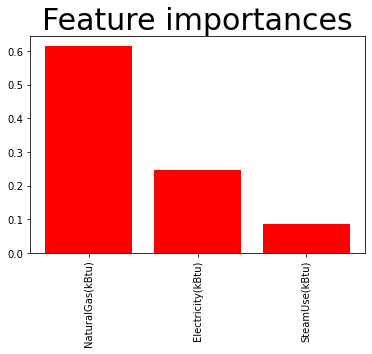

In [51]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C34"> 3.4) MLP </a>

###  a.) Création du modèle
#### modèle

In [52]:
from sklearn.neural_network import MLPRegressor

In [53]:
rp = MLPRegressor()

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (100,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'adam', 'sgd']
}

In [54]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
mlp = GridSearchCV(estimator=rp, param_grid = param_grid, cv=5, scoring = 'r2')

In [ ]:
# Optimiser sur le jeu d'entraînement
mlp.fit(X_train, y_train)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# résultats de la validation croisée
res = mlp.cv_results_
res = pd.DataFrame(res)
res

In [ ]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(mlp.best_params_)

In [ ]:
mlp_r2 = mlp.best_score_
print("Best score: ", mlp.best_score_)

In [ ]:
y_train_pred = mlp.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

#### Prédiction

In [ ]:
y_test_pred = mlp.predict(X_test)

### b.) Evaluation du modèle

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [ ]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_mlp  = pd.DataFrame(scores, index = ['MLP'])
df_mlp

### c.) Features importances

In [ ]:
# Extraire le meilleur estimator de GridSearchCV object
best_mlp = mlp.best_estimator_

# Calculate feature importances
coefs = np.abs(best_mlp.coefs_[0])
feature_importances = np.sum(coefs, axis=1)

In [ ]:
# Obtenir les importances de caractéristiques
feat_imp = feature_importances


importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances = importances.iloc[:3]
importances

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C35"> 3.5) XGBoost </a>
#### Installation de XGBoost

In [ ]:
pip install xgboost

###  a.) Création du modèle
#### modèle

In [ ]:
import xgboost as xgb

In [ ]:
# initialisation du modèle
rp = xgb.XGBRegressor(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
}

In [ ]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
gb = GridSearchCV(estimator=rp, param_grid = param_grid, cv=5, scoring = 'r2')

In [ ]:
# Optimiser sur le jeu d'entraînement
gb.fit(X_train, y_train)

In [ ]:
# résultats de la validation croisée
res = gb.cv_results_
res = pd.DataFrame(res)
res

In [ ]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(gb.best_params_)

In [ ]:
gb_r2 = gb.best_score_
print("Best score: ", gb.best_score_)

In [ ]:
y_train_pred = gb.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

#### Prédiction

In [ ]:
y_test_pred = gb.predict(X_test)

### b.) Evaluation du modèle

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

### Les scores

In [ ]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_gb  = pd.DataFrame(scores, index = ['XGBoost'])
df_gb

### c.) Features importances

In [ ]:
# Obtenir les importances de caractéristiques
feat_imp = gb.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances = importances.iloc[:3]
importances

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

# <a name="C4"> CHOIX DU MODELE </a>
## <a name="C41"> 4.1) Tableau récapitulatif des scores du modèle </a>

#### best scores issus du GridSearchcv

In [ ]:
scores = {
    'linear reg':lr_r2,
    'RandomForest':rfr_r2,
    'grd boosting' : gbr_r2,
    'mlp' : mlp_r2,
    'XGB' :gb_r2
}
R2  = pd.DataFrame(scores, index = ['R²'])
R2

Comme, nous pouvons le constater dans le tableau le modèle présentant le meilleur score est celui de : **Gradiant Boosting**

#### Tableau compilatif des scores du testing set 

In [ ]:
DF1 = pd.concat([df_lr,df_gr,df_rfr,df_mlp,df_gb])
DF1

## <a name="C42"> 4.2) Modèle Gradiant Boosting avec la librairie LIME </a> 

#### Installation de la librairie LIME

In [ ]:
pip install lime

#### Feature importance 

In [ ]:
import random
import lime
import lime.lime_tabular

In [ ]:
# Création d'un explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns.values, discretize_continuous=True, mode='regression')

# Calcul de l'importance des fonctionnalités pour les instances de test
for i in range(5):
    exp = explainer.explain_instance(X_test.values[i], gbr.predict, num_features=5)
    print('Instance {}:'.format(i))
    print('True value: {}'.format(y_test.values[i]))
    print('Predicted value: {}'.format(gbr.predict(X_test.values[i].reshape(1, -1))[0]))
    print('Explanation: \n{}'.format(exp.as_list()))
# Visualisation de l'importance des fonctionnalités
    fig = exp.as_pyplot_figure()
    fig.suptitle('Feature importance {}'.format(i))
    plt.show()


# <a name="C5"> MODELISATION SANS "ENERGYSTARScore"</a>

#### Préparation des données

In [ ]:
X = data.drop(columns= ["Target_Energies","Target_GES","ENERGYSTARScore","GHGEmissionsIntensity"])
y = data['Target_GES']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=5, shuffle=True)

X_train.head()

In [ ]:
y_test.head()

## <a name="C51"> 5.1) Regression linéaire </a>


###  a.) Création du modèle

In [ ]:
parameters = {'normalize': False}
# initialisation du modèle
lr = LinearRegression()
# Adapter les données (entraînement du modèle)
lr.fit(X_train, y_train)
# Prédiction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

### b.) Evaluation du modèle

####  Evaluation du training set

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_train, y_train_pred)
mse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_lr_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [ ]:
# l'erreur quadratique moyenne
mse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Le score R²
r2 = r2_score(y_test, y_test_pred)
# l'erreur carré relative
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_lr  = pd.DataFrame(scores, index = ['Régression Linéaire'])

In [ ]:
df = pd.concat([df_lr_train,df_lr])
print("REGRESSION LINEAIRE :")
df

## <a name="C52"> 5.2) Forêt Aléatoire </a>

###  a.) Création du modèle

In [ ]:
# initialisation du modèle
rfr = model_class(random_state=42, max_depth= 5, n_estimators= 100)
# Adapter les données (entraînement du modèle)
rfr.fit(X_train, y_train)
# Prédiction
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [ ]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_rfr_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_rfr = pd.DataFrame(scores, index = ['Forêt Aléatoire'])

In [ ]:
df = pd.concat([df_rfr_train,df_rfr])
print("FORÊT ALEATOIRE :")
df

## <a name="C53"> 5.3) Gradient Boosting  </a>
###  a.) Création du modèle

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters for GradientBoostingRegressor
gbr_params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

gbr = GradientBoostingRegressor(**gbr_params,random_state=0)
gbr.fit(X_train, y_train)
# Prédiction
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [ ]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_grb_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_grb = pd.DataFrame(scores, index = ['Gradient Boosting'])

In [ ]:
df = pd.concat([df_grb_train,df_grb])
print("GRADIENT BOOSTING  :")
df

## <a name="C54"> 5.4) MLP </a>
###  a.) Création du modèle

In [ ]:
mlp = MLPRegressor(activation = 'relu', hidden_layer_sizes= (30,), solver ='lbfgs')
mlp.fit(X_train, y_train)
# Prédiction
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [ ]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_mlp_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_mlp = pd.DataFrame(scores, index = ['MLP'])

In [ ]:
df = pd.concat([df_mlp_train, df_mlp])
print("MLP :")
df

## <a name="C55"> 5.5) XGBoost </a>
###  a.) Création du modèle

In [ ]:
gb = xgb.XGBRegressor(learning_rate= 0.2, max_depth=3, n_estimators= 300) 
gb.fit(X_train, y_train)
# Prédiction
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [ ]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_gb_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [ ]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_gb = pd.DataFrame(scores, index = ['XGBoost'])

In [ ]:
df = pd.concat([df_gb_train, df_gb])
print("XGBOOST :")
df

## Tableau récapitulatif des scores

In [ ]:
DF2 = pd.concat([df_lr,df_grb,df_rfr,df_mlp,df_gb])
DF2

In [ ]:
DF2 = DF2.drop(columns=["mse","rse"])
DF2 = DF2.transpose()

DF1 = DF1.drop(columns=["mse","rse"])
DF1 = DF1.transpose()

DF = pd.concat([DF1,DF2])
DF.index = ["R²(avec ENERGYSTARScore)","R²(Sans ENERGYSTARScore)"]
DF

Nous ne constatons pas de changement notable du R².

# <a name="C6"> CONCLUSION </a>

Le meilleur modèle pour la prédiction de la consommation de l'énergie est l'algorithme Gradiant Boosting.

La suppression de la variable "ENERGYSTARScore" n'a pas d'impact majeur sur notre modèle.

Les variables ayant le plus d'importance dans la prédiction de lénergie sont : 

   - **SiteEUI(kBtu/sf) (54%)**
 
   - **Electricity(kBtu) (36%)**